# Reduce Number of Sturnus Samples to Half

In [9]:
import os
import pandas as pd

In [31]:
def load_dataset(dataset_path):
    dataset = pd.DataFrame(columns=['path', 'label'])
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".wav"):
                # new dataset row
                dataset_row = {'path': os.path.join(root, file), 'label': os.path.basename(root)}
                # append row to dataset
                dataset = pd.concat([dataset, pd.DataFrame([dataset_row])], ignore_index=True)
    return dataset

train_dataset = load_dataset("../../../Data/Dataset/Audios/For Classifier/train")
validation_dataset = load_dataset("../../../Data/Dataset/Audios/For Classifier/validation")

In [28]:
!ls ../../../Data/Dataset/Audios/For\ Classifier

 BirdSongDetectorTestSegments   test   'train - copia'
'Lanius - train'	        train   validation


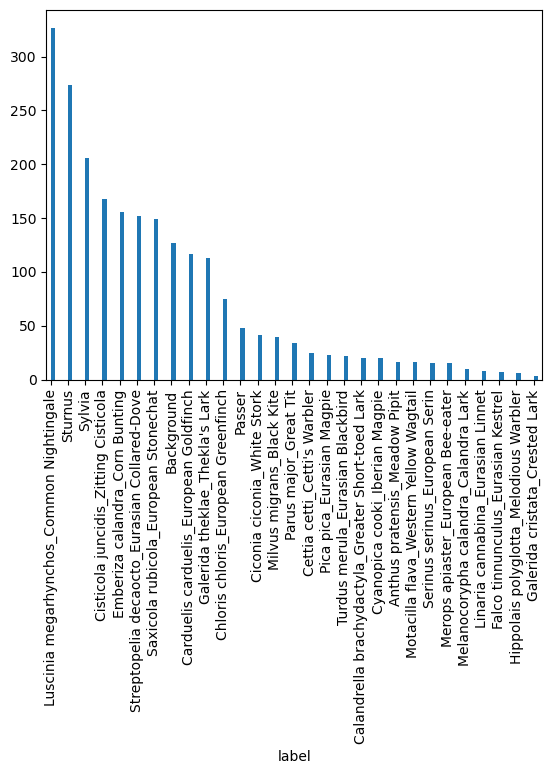

In [42]:
# plot bars in same figure, different color for each dataset, count of species
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train_dataset['label'].value_counts().plot(ax=ax, kind='bar', position=0, width=0.25)

plt.show()


In [39]:
# take half of Sturnus samples
train_dataset_sturnus = train_dataset[train_dataset['label'] == 'Sturnus'].sample(frac=0.5)

# copy the audio files in a folder in For Classification with name train_half_sturnus
import shutil

# create folder
if not os.path.exists("../../../Data/Dataset/Audios/For Classifier/train_half_sturnus/"):
    os.makedirs("../../../Data/Dataset/Audios/For Classifier/train_half_sturnus/")

for index, row in train_dataset_sturnus.iterrows():
    shutil.copy(row['path'], f"../../../Data/Dataset/Audios/For Classifier/train_half_sturnus/{os.path.basename(row['path'])}")